In [64]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
df = pd.read_csv('./data/players.csv')

In [66]:
df.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,int_international_reputations,str_work_rate,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,5,Medium/ Low,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee..."
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,5,High/ Low,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ..."
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,3,Medium/ Medium,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']"


In [67]:
df.shape

(19002, 56)

In [68]:
df.columns

Index(['int_player_id', 'str_player_name', 'str_positions', 'dt_date_of_birth',
       'int_height', 'int_weight', 'int_overall_rating',
       'int_potential_rating', 'str_best_position', 'int_best_overall_rating',
       'int_value', 'int_wage', 'int_team_id', 'str_nationality',
       'int_crossing', 'int_finishing', 'int_heading_accuracy',
       'int_short_passing', 'int_volleys', 'int_defensive_awareness',
       'int_standing_tackle', 'int_sliding_tackle', 'int_diving',
       'int_handling', 'int_kicking', 'int_gk_positioning', 'int_reflexes',
       'int_aggression', 'int_interceptions', 'int_positioning', 'int_vision',
       'int_penalties', 'int_composure', 'int_acceleration',
       'int_sprint_speed', 'int_agility', 'int_reactions', 'int_balance',
       'int_shot_power', 'int_jumping', 'int_stamina', 'int_strength',
       'int_long_shots', 'str_preferred_foot', 'int_weak_foot',
       'int_skill_moves', 'int_international_reputations', 'str_work_rate',
       'str_body_

In [69]:
pd.DatetimeIndex(pd.to_datetime(df['dt_date_of_birth'])).year

Int64Index([1987, 1985, 1993, 1991, 1992, 1988, 1998, 1992, 1992, 1992,
            ...
            1999, 1997, 1999, 1999, 1997, 1999, 2003, 1999, 2003, 2001],
           dtype='int64', name='dt_date_of_birth', length=19002)

In [7]:
date.today().year

2023

In [8]:
df['int_player_age'] = date.today().year - pd.DatetimeIndex(pd.to_datetime(df['dt_date_of_birth'])).year

## looking for wage

<AxesSubplot:>

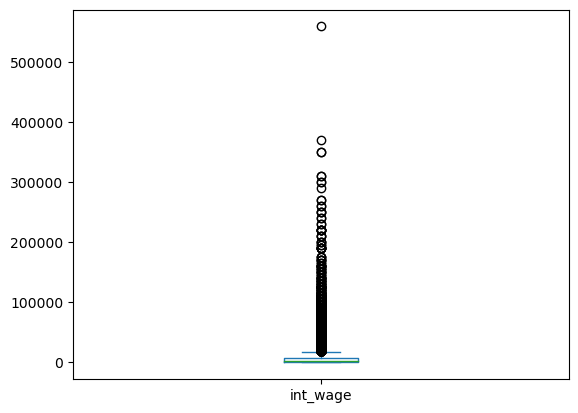

In [9]:
df.int_wage.plot.box()

In [10]:
df['int_wage'].describe()

count     19002.000000
mean       9113.167035
std       19735.324238
min           0.000000
25%        1000.000000
50%        3000.000000
75%        8000.000000
max      560000.000000
Name: int_wage, dtype: float64

In [11]:
IQR = np.percentile(df.int_wage,75)-np.percentile(df.int_wage,25)

In [12]:
(df.int_wage>np.percentile(df.int_wage,75)+1.5*IQR).value_counts()

False    16629
True      2373
Name: int_wage, dtype: int64

In [13]:
(df.int_wage>np.percentile(df.int_wage,75)+1.5*IQR).value_counts()[1]/df.shape[0] * 100

12.488159141143038

In [14]:
(df.int_wage>np.percentile(df.int_wage,75)+2.5*IQR).value_counts()

False    17354
True      1648
Name: int_wage, dtype: int64

In [15]:
(df.int_wage>np.percentile(df.int_wage,75)+2.5*IQR).value_counts()[1]/df.shape[0] * 100

8.672771287232923

In [16]:
df[df.int_wage>np.percentile(df.int_wage,75)+2.5*IQR].int_wage.sum()

91579000

In [17]:
df[df.int_wage<=np.percentile(df.int_wage,75)+2.5*IQR].int_wage.sum()

81589400

<AxesSubplot:>

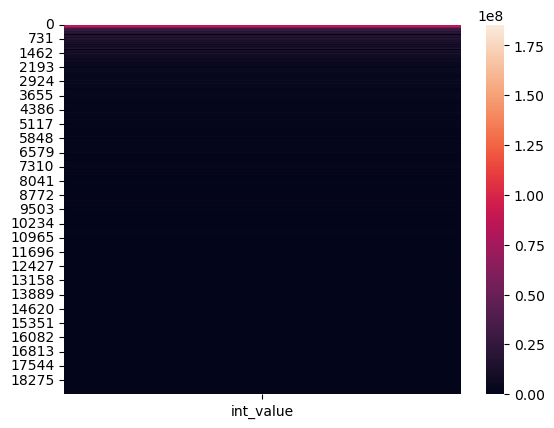

In [33]:
sns.heatmap(df.iloc[:,10:11])

## one-hot for position

In [19]:
df.dtypes

int_player_id                      int64
str_player_name                   object
str_positions                     object
dt_date_of_birth                  object
int_height                         int64
int_weight                         int64
int_overall_rating                 int64
int_potential_rating               int64
str_best_position                 object
int_best_overall_rating            int64
int_value                          int64
int_wage                           int64
int_team_id                      float64
str_nationality                   object
int_crossing                       int64
int_finishing                      int64
int_heading_accuracy               int64
int_short_passing                  int64
int_volleys                        int64
int_defensive_awareness            int64
int_standing_tackle                int64
int_sliding_tackle                 int64
int_diving                         int64
int_handling                       int64
int_kicking     

In [70]:
df['str_positions'].value_counts()

CB             2437
GK             2088
ST             1873
CDM, CM         846
CM              780
               ... 
LB, LW, RB        1
CF, RM, RWB       1
RM, RW, RB        1
CDM, RM, CM       1
LB, LWB, LW       1
Name: str_positions, Length: 642, dtype: int64

In [101]:
df['str_best_position'].value_counts()

CB     3684
ST     2699
CAM    2301
GK     2089
RM     1596
CDM    1456
RB     1082
LB     1067
CM     1043
LM      880
RW      299
RWB     284
LWB     260
LW      186
CF       76
Name: str_best_position, dtype: int64

In [71]:
df['pos'] = df['str_positions'].str.replace(" ","")

In [72]:
df['pos'].str.get_dummies(sep = ',').columns

Index(['CAM', 'CB', 'CDM', 'CF', 'CM', 'GK', 'LB', 'LM', 'LW', 'LWB', 'RB',
       'RM', 'RW', 'RWB', 'ST'],
      dtype='object')

In [73]:
len(df['pos'].str.get_dummies(sep = ',').columns)

15

In [74]:
def pos_fun(x):
    re = ""
    tmp = x.split(",")
    for t in tmp:
        if "GK" in t :
            re += ",GK"
        elif "B" in t:
            re += ",Back"
        elif "M" in t:
            re += ",Mid"
        else:
            re += ",Front"
    return re;

In [75]:
df['pos'] = df['pos'].apply(pos_fun)

In [78]:
t = df['pos'].str.get_dummies(sep = ',')
t

,Back,Front,GK,Mid
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,0,1,0,1
...,...,...,...,...
18997,1,0,0,0
18998,0,1,0,0
18999,1,0,0,0
19000,0,0,0,1


In [81]:
(t.Back+t.Front+t.GK+t.Mid).describe()

count    19002.000000
mean         1.183981
std          0.394878
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          3.000000
dtype: float64

In [100]:
df['int_team_id'].value_counts()

21.0     36
81.0     34
50.0     34
22.0     34
45.0     34
         ..
667.0    19
670.0    19
615.0    19
636.0    19
657.0    19
Name: int_team_id, Length: 681, dtype: int64

## analysis trait

In [84]:
df['str_trait']

0        ['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...
1        ['Power Free-Kick', 'Flair', 'Long Shot Taker ...
2                   ['GK Long Throw', 'Comes For Crosses']
3        ['Injury Prone', 'Leadership', 'Early Crosser'...
4        ['Injury Prone', 'Flair', 'Speed Dribbler (AI)...
                               ...                        
18997                                                  NaN
18998                                                  NaN
18999                                                  NaN
19000                                                  NaN
19001                                                  NaN
Name: str_trait, Length: 19002, dtype: object

In [92]:
df['tmp'] = df['str_trait'].str.replace(" ","")
df['tmp']

0        ['FinesseShot','LongShotTaker(AI)','SpeedDribb...
1        ['PowerFree-Kick','Flair','LongShotTaker(AI)',...
2                        ['GKLongThrow','ComesForCrosses']
3        ['InjuryProne','Leadership','EarlyCrosser','Lo...
4        ['InjuryProne','Flair','SpeedDribbler(AI)','Ou...
                               ...                        
18997                                                  NaN
18998                                                  NaN
18999                                                  NaN
19000                                                  NaN
19001                                                  NaN
Name: tmp, Length: 19002, dtype: object

In [96]:
df['tmp'].str.get_dummies(sep = ',').columns

Index([''CautiousWithCrosses'', ''CautiousWithCrosses']', ''ChipShot(AI)'',
       ''ChipShot(AI)']', ''ComesForCrosses'', ''ComesForCrosses']',
       ''DivesIntoTackles(AI)'', ''DivesIntoTackles(AI)']', ''EarlyCrosser'',
       ''EarlyCrosser']', ''FinesseShot'', ''FinesseShot']', ''Flair'',
       ''Flair']', ''GKLongThrow'', ''GKLongThrow']', ''GiantThrow-in'',
       ''GiantThrow-in']', ''InjuryProne'', ''InjuryProne']', ''Leadership'',
       ''Leadership']', ''LongPasser(AI)'', ''LongPasser(AI)']',
       ''LongShotTaker(AI)'', ''LongShotTaker(AI)']', ''OneClubPlayer'',
       ''OutsideFootShot'', ''OutsideFootShot']', ''Playmaker(AI)'',
       ''Playmaker(AI)']', ''PowerFree-Kick'', ''PowerFree-Kick']',
       ''PowerHeader'', ''PowerHeader']', ''RushesOutOfGoal'',
       ''RushesOutOfGoal']', ''SaveswithFeet']', ''SolidPlayer'',
       ''SolidPlayer']', ''SpeedDribbler(AI)'', ''SpeedDribbler(AI)']',
       ''TeamPlayer'', ''TeamPlayer']', ''TechnicalDribbler(AI)']',
       '['

In [97]:
len(df['tmp'].str.get_dummies(sep = ',').columns)

91

## qcut and cross-validation （not finished ）

In [27]:
tmp = df.copy()
tmp['rating'] = pd.qcut(df.int_overall_rating,q=3,labels=['low','med','high'])

In [28]:
tmp.head(3)

,int_player_id,str_player_name,str_positions,dt_date_of_birth,int_height,int_weight,int_overall_rating,int_potential_rating,str_best_position,int_best_overall_rating,...,str_body_type,int_dribbling,int_curve,int_fk_accuracy,int_long_passing,int_ball_control,str_player_speciality,str_trait,int_player_age,rating
0,1,Lionel Andrés Messi Cuccittini,"RW, ST, CF",1987-06-24,170,72,93,93,RW,93,...,Unique,96,93,94,91,96,"['Dribbler', 'Distance Shooter', 'FK Specialis...","['Finesse Shot', 'Long Shot Taker (AI)', 'Spee...",36,high
1,2,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",1985-02-05,187,83,92,92,ST,92,...,Unique,88,81,76,77,92,"['Aerial Threat', 'Dribbler', 'Distance Shoote...","['Power Free-Kick', 'Flair', 'Long Shot Taker ...",38,high
2,3,Jan Oblak,GK,1993-01-07,188,87,91,93,GK,91,...,Unique,12,13,14,40,30,NaN,"['GK Long Throw', 'Comes For Crosses']",30,high


In [29]:
X = tmp.drop(['str_positions','int_overall_rating','rating'],axis=1)
y = tmp.rating

In [30]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]}

In [31]:
dtree = DecisionTreeClassifier()
dtreeCV = GridSearchCV(dtree, param_grid=parameters,
                       return_train_score=True,
                       n_jobs=-1)

In [32]:
dtreeCV.fit(X,y)

ValueError: 
All the 75 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Aleksandar Mitrović'

--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 969, in fit
    super().fit(
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/tree/_classes.py", line 172, in fit
    X, y = self._validate_data(
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/base.py", line 591, in _validate_data
    X = check_array(X, input_name="X", **check_X_params)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/sklearn/utils/validation.py", line 856, in check_array
    array = np.asarray(array, order=order, dtype=dtype)
  File "/Users/IscoJ/opt/anaconda3/envs/tf2/lib/python3.9/site-packages/pandas/core/generic.py", line 2070, in __array__
    return np.asarray(self._values, dtype=dtype)
ValueError: could not convert string to float: 'Lionel Andrés Messi Cuccittini'
